In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
nino3 = np.genfromtxt ('enso_900_2002_1.txt', delimiter=",")
ismr = np.genfromtxt ('sasmi_norm_900_2002.txt', delimiter=",")
vrf = np.genfromtxt ('sigl.txt', delimiter=",")
print(nino3.shape)
print(vrf.shape)

(1104,)
(1001,)


In [3]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time
def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(900, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time
def moving_average_anomaly(dismr,n=360):
    """
    Generates moving average anomaly of long time series
    """
    #print(dismr.shape)
    dismr_anom = np.zeros((dismr.shape[0]))
    dismr_std = np.zeros((dismr.shape[0]))
    dismr_anom[0:n/2] = ( dismr[0:n/2] - np.mean(dismr[0:n]) )/np.std(dismr[0:n])
    dismr_anom[dismr.shape[0]-n/2:] = ( dismr[dismr.shape[0]-n/2:] - np.mean(dismr[dismr.shape[0]-n:]) )/np.std(dismr[dismr.shape[0]-n:])
    #print(dismr_anom)
    dismr_std[0:n/2] = np.std(dismr[0:n])
    dismr_std[dismr.shape[0]-n/2:] = np.std(dismr[dismr.shape[0]-n:])
    
    for i in range(np.int(n/2),np.int(dismr.shape[0]-n/2)):
        dismr_anom[i] = (dismr[i] - np.mean(dismr[i-n/2:i+n/2]))/np.std(dismr[i-n/2:i+n/2])
        dismr_std[i] = np.std(dismr[i-n/2:i+n/2])
    return dismr_anom, dismr_std

In [4]:
nino3_900_1850 = nino3[1:952]
ismr_900_1850 = ismr[1:952]
vrf_900_1850 = vrf[50:]
#print(nino3_900_1850.shape)
#print(vrf_900_1850.shape)
#print(nino3_900_1850)
year_time = yearly_time_axis(ismr_900_1850)
volc_idx = np.where(vrf_900_1850 < -0.1)[0]
print(volc_idx.shape)
print(volc_idx[46])
print(nino3_900_1850.shape)
print(vrf_900_1850.shape)

(110,)
436
(951,)
(951,)


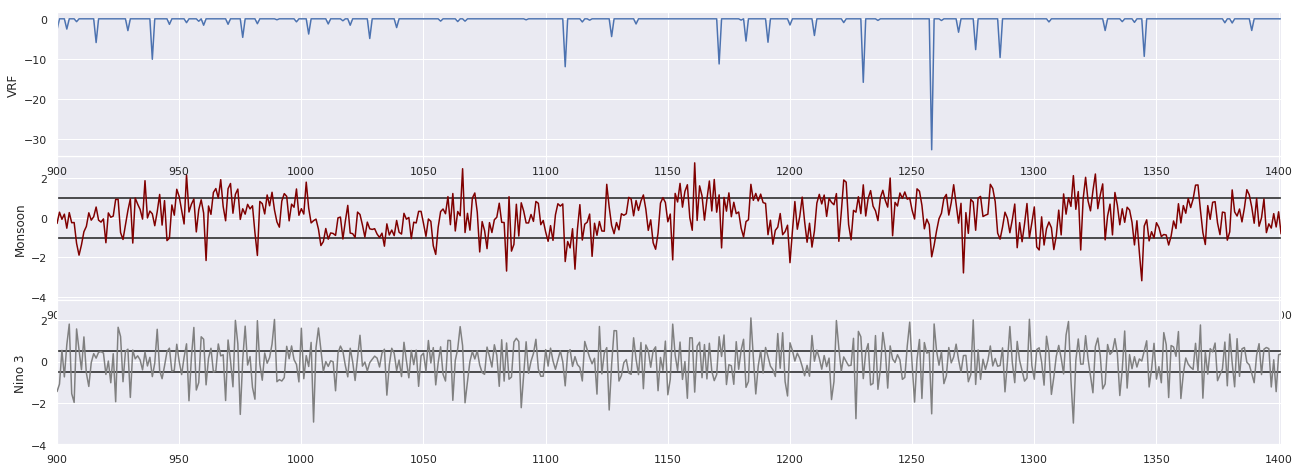

In [5]:
fig = plt.figure(figsize=[20, 20])
axlabfs, tiklabfs, splabfs = 4, 5, 7
start_year = 900
end_year = 1400
#plt.grid(True)
ax1 = fig.add_axes([0.1, 0.28, 0.85, 0.1])
ax1.plot(year_time, ismr_900_1850,c="Maroon", zorder=5,)
ylo, yhi = ax1.get_ylim()
#ax1.bar(left = te, width = 31 * np.ones(len(te)), height = (yhi - ylo) * np.ones(len(te)),
#       bottom = ylo * np.ones(len(te)),edgecolor="none", facecolor="Turquoise", zorder=1,)
ax2 = fig.add_axes([0.1, 0.18, 0.85, 0.1])
ax3 = fig.add_axes([0.1, 0.38, 0.85, 0.1])
ax2.plot(year_time, nino3_900_1850, c="Gray", zorder=5)
ax3.plot(year_time, vrf_900_1850)
xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
ax1.set_xlim(xlo, xhi)
ax2.set_xlim(xlo, xhi)
ax3.set_xlim(xlo, xhi)
ax1.axhline(y=1, color='k', linestyle='-')
ax1.axhline(y=-1, color='k', linestyle='-')
ax2.axhline(y=0.5, color='k', linestyle='-')
ax2.axhline(y=-0.5, color='k', linestyle='-')
#ax1.set_yticks(np.arange(-2, 2, step=0.5))
#ax2.set_yticks(np.arange(-2, 2, step=0.5))
ax1.set_ylabel('Monsoon')
ax2.set_ylabel('Nino 3')
ax3.set_ylabel('VRF')
#ax3.get_xaxis().set_ticks([])

#ax3.grid(True)
plt.savefig('enso_monsoon_ts_900_1400.eps', format='eps', dpi=1000)

In [6]:
import random
import warnings
warnings.filterwarnings('ignore')
#volc_data_mon = np.zeros((1001*12))
#for yyyy in range(1001):
    #print(yyyy)
#    volc_data_mon[yyyy*12:(yyyy+1)*12] = vrf[yyyy]
#print(volc_data_mon[0:120])
#ismr_anom_1550_1750 = ismr_anom[8400:10800]
#nino3_anom_1550_1750 = nino3_anom[8400:10800]
N=10000
niter = 0
count_elnino_drought = np.zeros((N))
count_lanina_goodmonsoon  = np.zeros((N))
volc_idx = np.where(vrf_900_1850 < -0.1)[0]
while niter<N:
    dummy_log_ed = np.zeros((20))
    dummy_log_lg = np.zeros((20))
    rand_year = random.sample(range(0,110), 1)
    if rand_year[0]<11:
        dummy_ismr = ismr_900_1850[volc_idx[rand_year[0]]:volc_idx[rand_year[0]]+20]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_900_1850[volc_idx[rand_year[0]]:volc_idx[rand_year[0]]+20]
        dummy_nino3_1 = dummy_nino3
    elif rand_year[0]>99:
        dummy_ismr = ismr_900_1850[volc_idx[rand_year[0]]-20:volc_idx[rand_year[0]]]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_900_1850[volc_idx[rand_year[0]]-20:volc_idx[rand_year[0]]]
        dummy_nino3_1 = dummy_nino3
    else:
        dummy_ismr = ismr_900_1850[volc_idx[rand_year[0]]-10:volc_idx[rand_year[0]]+10]
        dummy_ismr_1 = dummy_ismr
        dummy_nino3 = nino3_900_1850[volc_idx[rand_year[0]]-10:volc_idx[rand_year[0]]+10]
        dummy_nino3_1 = dummy_nino3
    
    #if np.max(vrf_900_1850[rand_year[0]-10:rand_year[0]+10]) < 0.1:
    #    continue
    #print(niter)
    for i in range(20):
        if dummy_nino3_1[i]>0.5 and dummy_ismr_1[i]<1.0:
            dummy_log_ed[i] = 1.0
        if dummy_nino3_1[i]<-0.5 and dummy_ismr_1[i]>1.0:
            dummy_log_lg[i] = 1.0
    count_elnino_drought[niter] = np.sum(dummy_log_ed)
    count_lanina_goodmonsoon[niter] = np.sum(dummy_log_lg)
    niter = niter + 1

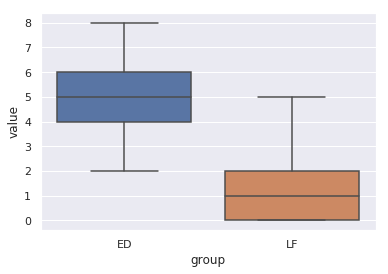

In [7]:
import pandas as pd
ed = pd.DataFrame({ 'group' : np.repeat('ED',10000), 'value': count_elnino_drought })
lf = pd.DataFrame({ 'group' : np.repeat('LF',10000), 'value': count_lanina_goodmonsoon })
df=ed.append(lf)
sns.boxplot(x='group', y='value', data=df)
plt.savefig('ed_lf.eps', format='eps', dpi=1000)

In [11]:
import random
import warnings
warnings.filterwarnings('ignore')
N=10000
niter = 0
count_elnino_drought_no_volcano = np.zeros((N))
count_lanina_goodmonsoon_no_volcano  = np.zeros((N))
while niter<N:
    dummy_log_ed = np.zeros((20))
    dummy_log_lg = np.zeros((20))
    rand_year = random.sample(range(0,930), 1)
    if np.max(vrf_900_1850[rand_year[0]:rand_year[0]+20]) > 0.1:
        continue
    dummy_ismr = ismr_900_1850[rand_year[0]:rand_year[0]+20]
    dummy_ismr_1 = dummy_ismr
    dummy_nino3 = nino3_900_1850[rand_year[0]:rand_year[0]+20]
    dummy_nino3_1 = dummy_nino3

    for i in range(20):
        if dummy_nino3_1[i]>0.5 and dummy_ismr_1[i]<1.0:
            dummy_log_ed[i] = 1.0
        if dummy_nino3_1[i]<-0.5 and dummy_ismr_1[i]>1.0:
            dummy_log_lg[i] = 1.0
    count_elnino_drought_no_volcano[niter] = np.sum(dummy_log_ed)
    count_lanina_goodmonsoon_no_volcano[niter] = np.sum(dummy_log_lg)
    niter = niter + 1

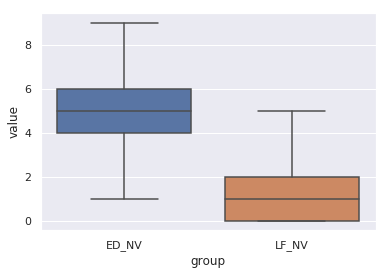

In [12]:
import pandas as pd
ed = pd.DataFrame({ 'group' : np.repeat('ED_NV',10000), 'value': count_elnino_drought_no_volcano })
lf = pd.DataFrame({ 'group' : np.repeat('LF_NV',10000), 'value': count_lanina_goodmonsoon_no_volcano })
df=ed.append(lf)
sns.boxplot(x='group', y='value', data=df)
plt.savefig('ed_lf.eps', format='eps', dpi=1000)

In [22]:
np.percentile(count_elnino_drought,80)

6.0

In [23]:
np.percentile(count_elnino_drought_no_volcano,80)

6.0